# Communal Conflict model in Ethiopia
## Ethiopia, admin2, monthly data
### 1. Random Forest Classifier 

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import xgboost
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sns

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [33]:
#os.chdir('/home/ubuntu/darpa/models/conflict_probability')

In [34]:
#url = 'https://data.kimetrica.com/dataset/4dbc3cc7-9474-49f2-bfd4-231e78401caa/resource/7423b71d-ce8c-437c-9fe6-2d9ba58d6155/download/dataset_communal_cnflict_model.csv'
df = pd.read_csv('/Users/yaredhurisa/Google Drive/Probability of conflict/indicators/eth_cc_final_dataset_monthly.csv')
list(df.columns)

['Unnamed: 0',
 'group',
 'date',
 'cc_onset',
 'fatalities',
 'cc_onset_1',
 'fatalities_1',
 'actor_state_1',
 'actor_rebel_groups_1',
 'actor_political_militias_1',
 'actor_identity_militias_1',
 'actor_civilians_1',
 'actor_others_1',
 'inflation_all_1',
 'rainfall_1',
 'temperature_1',
 'pop_1',
 'maize_kg_birr_1',
 'teff_kg_birr_1',
 'wheat_kg_birr_1',
 'ndvi_1',
 'fs_crisis_1',
 'df_emergency_1',
 'fs_famine_1',
 'fs_minimal_1',
 'fs_stressed_1',
 'cc_onset_2',
 'fatalities_2',
 'actor_state_2',
 'actor_rebel_groups_2',
 'actor_political_militias_2',
 'actor_identity_militias_2',
 'actor_civilians_2',
 'actor_others_2',
 'inflation_all_2',
 'rainfall_2',
 'temperature_2',
 'pop_2',
 'maize_kg_birr_2',
 'teff_kg_birr_2',
 'wheat_kg_birr_2',
 'ndvi_2',
 'fs_crisis_2',
 'df_emergency_2',
 'fs_famine_2',
 'fs_minimal_2',
 'fs_stressed_2',
 'cc_onset_3',
 'fatalities_3',
 'actor_state_3',
 'actor_rebel_groups_3',
 'actor_political_militias_3',
 'actor_identity_militias_3',
 'actor_ci

In [35]:
df=df.drop(['cc_onset'], axis=1)

In [36]:
#Training, and test 
start_date = "2009-12-01"
end_date = "2018-01-01"
mask = (df['date'] > start_date) & (df['date'] < end_date)
train1 = df.loc[mask]


start_date = "2017-12-01"
end_date = "2019-01-01"
mask = (df['date'] > start_date) & (df['date'] < end_date)
test1 = df.loc[mask]


In [37]:
test1.head()

,Unnamed: 0,group,date,fatalities,cc_onset_1,fatalities_1,actor_state_1,actor_rebel_groups_1,actor_political_militias_1,actor_identity_militias_1,...,pop_12,maize_kg_birr_12,teff_kg_birr_12,wheat_kg_birr_12,ndvi_12,fs_crisis_12,df_emergency_12,fs_famine_12,fs_minimal_12,fs_stressed_12
20,21,Addis Ababa_Addis Ababa,2018-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3891784.0,8.119193,14.196777,14.532131,128.934691,0.0,0.0,0.0,0.0,0.0
43,45,Addis Ababa_Addis Ababa,2018-02-01,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3891784.0,8.275183,14.365806,14.606255,128.334243,0.0,0.0,0.0,0.0,0.0
66,69,Addis Ababa_Addis Ababa,2018-03-01,13.0,0.0,1.0,0.0,0.0,0.0,0.0,...,3891784.0,8.229432,14.575213,14.786679,128.967035,0.0,0.0,0.0,0.0,0.0
89,93,Addis Ababa_Addis Ababa,2018-04-01,0.0,0.0,13.0,0.0,0.0,0.0,0.0,...,3891784.0,8.314511,14.711928,15.082420,129.551074,0.0,0.0,0.0,0.0,0.0
112,117,Addis Ababa_Addis Ababa,2018-05-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3891784.0,8.324555,14.900207,15.649164,130.757934,0.0,0.0,0.0,0.0,0.0


In [38]:
X= df[[
 'fatalities_1',
 'actor_state_1',
 'actor_rebel_groups_1',
 'actor_political_militias_1',
 'actor_identity_militias_1',
 'actor_civilians_1',
 'actor_others_1',
 'inflation_all_1',
 'rainfall_1',
 'temperature_1',
 'pop_1',
 'maize_kg_birr_1',
 'teff_kg_birr_1',
 'wheat_kg_birr_1',
 'ndvi_1',
 'fs_crisis_1',
 'df_emergency_1',
 'fs_famine_1',
 'fs_minimal_1',
 'fs_stressed_1',
 'cc_onset_2',
 'fatalities_2',
 'actor_state_2',
 'actor_rebel_groups_2',
 'actor_political_militias_2',
 'actor_identity_militias_2',
 'actor_civilians_2',
 'actor_others_2',
 'inflation_all_2',
 'rainfall_2',
 'temperature_2',
 'pop_2',
 'maize_kg_birr_2',
 'teff_kg_birr_2',
 'wheat_kg_birr_2',
 'ndvi_2',
 'fs_crisis_2',
 'df_emergency_2',
 'fs_famine_2',
 'fs_minimal_2',
 'fs_stressed_2',
 'cc_onset_3',
 'fatalities_3',
 'actor_state_3',
 'actor_rebel_groups_3',
 'actor_political_militias_3',
 'actor_identity_militias_3',
 'actor_civilians_3',
 'actor_others_3',
 'inflation_all_3',
 'rainfall_3',
 'temperature_3',
 'pop_3',
 'maize_kg_birr_3',
 'teff_kg_birr_3',
 'wheat_kg_birr_3',
 'ndvi_3',
 'fs_crisis_3',
 'df_emergency_3',
 'fs_famine_3',
 'fs_minimal_3',
 'fs_stressed_3',
 'cc_onset_4',
 'fatalities_4',
 'actor_state_4',
 'actor_rebel_groups_4',
 'actor_political_militias_4',
 'actor_identity_militias_4',
 'actor_civilians_4',
 'actor_others_4',
 'inflation_all_4',
 'rainfall_4',
 'temperature_4',
 'pop_4',
 'maize_kg_birr_4',
 'teff_kg_birr_4',
 'wheat_kg_birr_4',
 'ndvi_4',
 'fs_crisis_4',
 'df_emergency_4',
 'fs_famine_4',
 'fs_minimal_4',
 'fs_stressed_4',
 'cc_onset_5',
 'fatalities_5',
 'actor_state_5',
 'actor_rebel_groups_5',
 'actor_political_militias_5',
 'actor_identity_militias_5',
 'actor_civilians_5',
 'actor_others_5',
 'inflation_all_5',
 'rainfall_5',
 'temperature_5',
 'pop_5',
 'maize_kg_birr_5',
 'teff_kg_birr_5',
 'wheat_kg_birr_5',
 'ndvi_5',
 'fs_crisis_5',
 'df_emergency_5',
 'fs_famine_5',
 'fs_minimal_5',
 'fs_stressed_5',
 'cc_onset_6',
 'fatalities_6',
 'actor_state_6',
 'actor_rebel_groups_6',
 'actor_political_militias_6',
 'actor_identity_militias_6',
 'actor_civilians_6',
 'actor_others_6',
 'inflation_all_6',
 'rainfall_6',
 'temperature_6',
 'pop_6',
 'maize_kg_birr_6',
 'teff_kg_birr_6',
 'wheat_kg_birr_6',
 'ndvi_6',
 'fs_crisis_6',
 'df_emergency_6',
 'fs_famine_6',
 'fs_minimal_6',
 'fs_stressed_6',
 'cc_onset_7',
 'fatalities_7',
 'actor_state_7',
 'actor_rebel_groups_7',
 'actor_political_militias_7',
 'actor_identity_militias_7',
 'actor_civilians_7',
 'actor_others_7',
 'inflation_all_7',
 'rainfall_7',
 'temperature_7',
 'pop_7',
 'maize_kg_birr_7',
 'teff_kg_birr_7',
 'wheat_kg_birr_7',
 'ndvi_7',
 'fs_crisis_7',
 'df_emergency_7',
 'fs_famine_7',
 'fs_minimal_7',
 'fs_stressed_7',
 'cc_onset_8',
 'fatalities_8',
 'actor_state_8',
 'actor_rebel_groups_8',
 'actor_political_militias_8',
 'actor_identity_militias_8',
 'actor_civilians_8',
 'actor_others_8',
 'inflation_all_8',
 'rainfall_8',
 'temperature_8',
 'pop_8',
 'maize_kg_birr_8',
 'teff_kg_birr_8',
 'wheat_kg_birr_8',
 'ndvi_8',
 'fs_crisis_8',
 'df_emergency_8',
 'fs_famine_8',
 'fs_minimal_8',
 'fs_stressed_8',
 'cc_onset_9',
 'fatalities_9',
 'actor_state_9',
 'actor_rebel_groups_9',
 'actor_political_militias_9',
 'actor_identity_militias_9',
 'actor_civilians_9',
 'actor_others_9',
 'inflation_all_9',
 'rainfall_9',
 'temperature_9',
 'pop_9',
 'maize_kg_birr_9',
 'teff_kg_birr_9',
 'wheat_kg_birr_9',
 'ndvi_9',
 'fs_crisis_9',
 'df_emergency_9',
 'fs_famine_9',
 'fs_minimal_9',
 'fs_stressed_9',
 'cc_onset_10',
 'fatalities_10',
 'actor_state_10',
 'actor_rebel_groups_10',
 'actor_political_militias_10',
 'actor_identity_militias_10',
 'actor_civilians_10',
 'actor_others_10',
 'inflation_all_10',
 'rainfall_10',
 'temperature_10',
 'pop_10',
 'maize_kg_birr_10',
 'teff_kg_birr_10',
 'wheat_kg_birr_10',
 'ndvi_10',
 'fs_crisis_10',
 'df_emergency_10',
 'fs_famine_10',
 'fs_minimal_10',
 'fs_stressed_10',
 'cc_onset_11',
 'fatalities_11',
 'actor_state_11',
 'actor_rebel_groups_11',
 'actor_political_militias_11',
 'actor_identity_militias_11',
 'actor_civilians_11',
 'actor_others_11',
 'inflation_all_11',
 'rainfall_11',
 'temperature_11',
 'pop_11',
 'maize_kg_birr_11',
 'teff_kg_birr_11',
 'wheat_kg_birr_11',
 'ndvi_11',
 'fs_crisis_11',
 'df_emergency_11',
 'fs_famine_11',
 'fs_minimal_11',
 'fs_stressed_11',
 'cc_onset_12',
 'fatalities_12',
 'actor_state_12',
 'actor_rebel_groups_12',
 'actor_political_militias_12',
 'actor_identity_militias_12',
 'actor_civilians_12',
 'actor_others_12',
 'inflation_all_12',
 'rainfall_12',
 'temperature_12',
 'pop_12',
 'maize_kg_birr_12',
 'teff_kg_birr_12',
 'wheat_kg_birr_12',
 'ndvi_12',
 'fs_crisis_12',
 'df_emergency_12',
 'fs_famine_12',
 'fs_minimal_12',
 'fs_stressed_12']]

In [39]:
y = np.log(df['fatalities']+1)

In [40]:
X_train = train1[[
 'fatalities_1',
 'actor_state_1',
 'actor_rebel_groups_1',
 'actor_political_militias_1',
 'actor_identity_militias_1',
 'actor_civilians_1',
 'actor_others_1',
 'inflation_all_1',
 'rainfall_1',
 'temperature_1',
 'pop_1',
 'maize_kg_birr_1',
 'teff_kg_birr_1',
 'wheat_kg_birr_1',
 'ndvi_1',
 'fs_crisis_1',
 'df_emergency_1',
 'fs_famine_1',
 'fs_minimal_1',
 'fs_stressed_1',
 'cc_onset_2',
 'fatalities_2',
 'actor_state_2',
 'actor_rebel_groups_2',
 'actor_political_militias_2',
 'actor_identity_militias_2',
 'actor_civilians_2',
 'actor_others_2',
 'inflation_all_2',
 'rainfall_2',
 'temperature_2',
 'pop_2',
 'maize_kg_birr_2',
 'teff_kg_birr_2',
 'wheat_kg_birr_2',
 'ndvi_2',
 'fs_crisis_2',
 'df_emergency_2',
 'fs_famine_2',
 'fs_minimal_2',
 'fs_stressed_2',
 'cc_onset_3',
 'fatalities_3',
 'actor_state_3',
 'actor_rebel_groups_3',
 'actor_political_militias_3',
 'actor_identity_militias_3',
 'actor_civilians_3',
 'actor_others_3',
 'inflation_all_3',
 'rainfall_3',
 'temperature_3',
 'pop_3',
 'maize_kg_birr_3',
 'teff_kg_birr_3',
 'wheat_kg_birr_3',
 'ndvi_3',
 'fs_crisis_3',
 'df_emergency_3',
 'fs_famine_3',
 'fs_minimal_3',
 'fs_stressed_3',
 'cc_onset_4',
 'fatalities_4',
 'actor_state_4',
 'actor_rebel_groups_4',
 'actor_political_militias_4',
 'actor_identity_militias_4',
 'actor_civilians_4',
 'actor_others_4',
 'inflation_all_4',
 'rainfall_4',
 'temperature_4',
 'pop_4',
 'maize_kg_birr_4',
 'teff_kg_birr_4',
 'wheat_kg_birr_4',
 'ndvi_4',
 'fs_crisis_4',
 'df_emergency_4',
 'fs_famine_4',
 'fs_minimal_4',
 'fs_stressed_4',
 'cc_onset_5',
 'fatalities_5',
 'actor_state_5',
 'actor_rebel_groups_5',
 'actor_political_militias_5',
 'actor_identity_militias_5',
 'actor_civilians_5',
 'actor_others_5',
 'inflation_all_5',
 'rainfall_5',
 'temperature_5',
 'pop_5',
 'maize_kg_birr_5',
 'teff_kg_birr_5',
 'wheat_kg_birr_5',
 'ndvi_5',
 'fs_crisis_5',
 'df_emergency_5',
 'fs_famine_5',
 'fs_minimal_5',
 'fs_stressed_5',
 'cc_onset_6',
 'fatalities_6',
 'actor_state_6',
 'actor_rebel_groups_6',
 'actor_political_militias_6',
 'actor_identity_militias_6',
 'actor_civilians_6',
 'actor_others_6',
 'inflation_all_6',
 'rainfall_6',
 'temperature_6',
 'pop_6',
 'maize_kg_birr_6',
 'teff_kg_birr_6',
 'wheat_kg_birr_6',
 'ndvi_6',
 'fs_crisis_6',
 'df_emergency_6',
 'fs_famine_6',
 'fs_minimal_6',
 'fs_stressed_6',
 'cc_onset_7',
 'fatalities_7',
 'actor_state_7',
 'actor_rebel_groups_7',
 'actor_political_militias_7',
 'actor_identity_militias_7',
 'actor_civilians_7',
 'actor_others_7',
 'inflation_all_7',
 'rainfall_7',
 'temperature_7',
 'pop_7',
 'maize_kg_birr_7',
 'teff_kg_birr_7',
 'wheat_kg_birr_7',
 'ndvi_7',
 'fs_crisis_7',
 'df_emergency_7',
 'fs_famine_7',
 'fs_minimal_7',
 'fs_stressed_7',
 'cc_onset_8',
 'fatalities_8',
 'actor_state_8',
 'actor_rebel_groups_8',
 'actor_political_militias_8',
 'actor_identity_militias_8',
 'actor_civilians_8',
 'actor_others_8',
 'inflation_all_8',
 'rainfall_8',
 'temperature_8',
 'pop_8',
 'maize_kg_birr_8',
 'teff_kg_birr_8',
 'wheat_kg_birr_8',
 'ndvi_8',
 'fs_crisis_8',
 'df_emergency_8',
 'fs_famine_8',
 'fs_minimal_8',
 'fs_stressed_8',
 'cc_onset_9',
 'fatalities_9',
 'actor_state_9',
 'actor_rebel_groups_9',
 'actor_political_militias_9',
 'actor_identity_militias_9',
 'actor_civilians_9',
 'actor_others_9',
 'inflation_all_9',
 'rainfall_9',
 'temperature_9',
 'pop_9',
 'maize_kg_birr_9',
 'teff_kg_birr_9',
 'wheat_kg_birr_9',
 'ndvi_9',
 'fs_crisis_9',
 'df_emergency_9',
 'fs_famine_9',
 'fs_minimal_9',
 'fs_stressed_9',
 'cc_onset_10',
 'fatalities_10',
 'actor_state_10',
 'actor_rebel_groups_10',
 'actor_political_militias_10',
 'actor_identity_militias_10',
 'actor_civilians_10',
 'actor_others_10',
 'inflation_all_10',
 'rainfall_10',
 'temperature_10',
 'pop_10',
 'maize_kg_birr_10',
 'teff_kg_birr_10',
 'wheat_kg_birr_10',
 'ndvi_10',
 'fs_crisis_10',
 'df_emergency_10',
 'fs_famine_10',
 'fs_minimal_10',
 'fs_stressed_10',
 'cc_onset_11',
 'fatalities_11',
 'actor_state_11',
 'actor_rebel_groups_11',
 'actor_political_militias_11',
 'actor_identity_militias_11',
 'actor_civilians_11',
 'actor_others_11',
 'inflation_all_11',
 'rainfall_11',
 'temperature_11',
 'pop_11',
 'maize_kg_birr_11',
 'teff_kg_birr_11',
 'wheat_kg_birr_11',
 'ndvi_11',
 'fs_crisis_11',
 'df_emergency_11',
 'fs_famine_11',
 'fs_minimal_11',
 'fs_stressed_11',
 'cc_onset_12',
 'fatalities_12',
 'actor_state_12',
 'actor_rebel_groups_12',
 'actor_political_militias_12',
 'actor_identity_militias_12',
 'actor_civilians_12',
 'actor_others_12',
 'inflation_all_12',
 'rainfall_12',
 'temperature_12',
 'pop_12',
 'maize_kg_birr_12',
 'teff_kg_birr_12',
 'wheat_kg_birr_12',
 'ndvi_12',
 'fs_crisis_12',
 'df_emergency_12',
 'fs_famine_12',
 'fs_minimal_12',
 'fs_stressed_12'
  ]]

In [41]:
y_train = np.log(train1['fatalities']+1)

In [42]:
y_test = np.log(test1['fatalities']+1)

In [43]:
X_test = test1[[
 'fatalities_1',
 'actor_state_1',
 'actor_rebel_groups_1',
 'actor_political_militias_1',
 'actor_identity_militias_1',
 'actor_civilians_1',
 'actor_others_1',
 'inflation_all_1',
 'rainfall_1',
 'temperature_1',
 'pop_1',
 'maize_kg_birr_1',
 'teff_kg_birr_1',
 'wheat_kg_birr_1',
 'ndvi_1',
 'fs_crisis_1',
 'df_emergency_1',
 'fs_famine_1',
 'fs_minimal_1',
 'fs_stressed_1',
 'cc_onset_2',
 'fatalities_2',
 'actor_state_2',
 'actor_rebel_groups_2',
 'actor_political_militias_2',
 'actor_identity_militias_2',
 'actor_civilians_2',
 'actor_others_2',
 'inflation_all_2',
 'rainfall_2',
 'temperature_2',
 'pop_2',
 'maize_kg_birr_2',
 'teff_kg_birr_2',
 'wheat_kg_birr_2',
 'ndvi_2',
 'fs_crisis_2',
 'df_emergency_2',
 'fs_famine_2',
 'fs_minimal_2',
 'fs_stressed_2',
 'cc_onset_3',
 'fatalities_3',
 'actor_state_3',
 'actor_rebel_groups_3',
 'actor_political_militias_3',
 'actor_identity_militias_3',
 'actor_civilians_3',
 'actor_others_3',
 'inflation_all_3',
 'rainfall_3',
 'temperature_3',
 'pop_3',
 'maize_kg_birr_3',
 'teff_kg_birr_3',
 'wheat_kg_birr_3',
 'ndvi_3',
 'fs_crisis_3',
 'df_emergency_3',
 'fs_famine_3',
 'fs_minimal_3',
 'fs_stressed_3',
 'cc_onset_4',
 'fatalities_4',
 'actor_state_4',
 'actor_rebel_groups_4',
 'actor_political_militias_4',
 'actor_identity_militias_4',
 'actor_civilians_4',
 'actor_others_4',
 'inflation_all_4',
 'rainfall_4',
 'temperature_4',
 'pop_4',
 'maize_kg_birr_4',
 'teff_kg_birr_4',
 'wheat_kg_birr_4',
 'ndvi_4',
 'fs_crisis_4',
 'df_emergency_4',
 'fs_famine_4',
 'fs_minimal_4',
 'fs_stressed_4',
 'cc_onset_5',
 'fatalities_5',
 'actor_state_5',
 'actor_rebel_groups_5',
 'actor_political_militias_5',
 'actor_identity_militias_5',
 'actor_civilians_5',
 'actor_others_5',
 'inflation_all_5',
 'rainfall_5',
 'temperature_5',
 'pop_5',
 'maize_kg_birr_5',
 'teff_kg_birr_5',
 'wheat_kg_birr_5',
 'ndvi_5',
 'fs_crisis_5',
 'df_emergency_5',
 'fs_famine_5',
 'fs_minimal_5',
 'fs_stressed_5',
 'cc_onset_6',
 'fatalities_6',
 'actor_state_6',
 'actor_rebel_groups_6',
 'actor_political_militias_6',
 'actor_identity_militias_6',
 'actor_civilians_6',
 'actor_others_6',
 'inflation_all_6',
 'rainfall_6',
 'temperature_6',
 'pop_6',
 'maize_kg_birr_6',
 'teff_kg_birr_6',
 'wheat_kg_birr_6',
 'ndvi_6',
 'fs_crisis_6',
 'df_emergency_6',
 'fs_famine_6',
 'fs_minimal_6',
 'fs_stressed_6',
 'cc_onset_7',
 'fatalities_7',
 'actor_state_7',
 'actor_rebel_groups_7',
 'actor_political_militias_7',
 'actor_identity_militias_7',
 'actor_civilians_7',
 'actor_others_7',
 'inflation_all_7',
 'rainfall_7',
 'temperature_7',
 'pop_7',
 'maize_kg_birr_7',
 'teff_kg_birr_7',
 'wheat_kg_birr_7',
 'ndvi_7',
 'fs_crisis_7',
 'df_emergency_7',
 'fs_famine_7',
 'fs_minimal_7',
 'fs_stressed_7',
 'cc_onset_8',
 'fatalities_8',
 'actor_state_8',
 'actor_rebel_groups_8',
 'actor_political_militias_8',
 'actor_identity_militias_8',
 'actor_civilians_8',
 'actor_others_8',
 'inflation_all_8',
 'rainfall_8',
 'temperature_8',
 'pop_8',
 'maize_kg_birr_8',
 'teff_kg_birr_8',
 'wheat_kg_birr_8',
 'ndvi_8',
 'fs_crisis_8',
 'df_emergency_8',
 'fs_famine_8',
 'fs_minimal_8',
 'fs_stressed_8',
 'cc_onset_9',
 'fatalities_9',
 'actor_state_9',
 'actor_rebel_groups_9',
 'actor_political_militias_9',
 'actor_identity_militias_9',
 'actor_civilians_9',
 'actor_others_9',
 'inflation_all_9',
 'rainfall_9',
 'temperature_9',
 'pop_9',
 'maize_kg_birr_9',
 'teff_kg_birr_9',
 'wheat_kg_birr_9',
 'ndvi_9',
 'fs_crisis_9',
 'df_emergency_9',
 'fs_famine_9',
 'fs_minimal_9',
 'fs_stressed_9',
 'cc_onset_10',
 'fatalities_10',
 'actor_state_10',
 'actor_rebel_groups_10',
 'actor_political_militias_10',
 'actor_identity_militias_10',
 'actor_civilians_10',
 'actor_others_10',
 'inflation_all_10',
 'rainfall_10',
 'temperature_10',
 'pop_10',
 'maize_kg_birr_10',
 'teff_kg_birr_10',
 'wheat_kg_birr_10',
 'ndvi_10',
 'fs_crisis_10',
 'df_emergency_10',
 'fs_famine_10',
 'fs_minimal_10',
 'fs_stressed_10',
 'cc_onset_11',
 'fatalities_11',
 'actor_state_11',
 'actor_rebel_groups_11',
 'actor_political_militias_11',
 'actor_identity_militias_11',
 'actor_civilians_11',
 'actor_others_11',
 'inflation_all_11',
 'rainfall_11',
 'temperature_11',
 'pop_11',
 'maize_kg_birr_11',
 'teff_kg_birr_11',
 'wheat_kg_birr_11',
 'ndvi_11',
 'fs_crisis_11',
 'df_emergency_11',
 'fs_famine_11',
 'fs_minimal_11',
 'fs_stressed_11',
 'cc_onset_12',
 'fatalities_12',
 'actor_state_12',
 'actor_rebel_groups_12',
 'actor_political_militias_12',
 'actor_identity_militias_12',
 'actor_civilians_12',
 'actor_others_12',
 'inflation_all_12',
 'rainfall_12',
 'temperature_12',
 'pop_12',
 'maize_kg_birr_12',
 'teff_kg_birr_12',
 'wheat_kg_birr_12',
 'ndvi_12',
 'fs_crisis_12',
 'df_emergency_12',
 'fs_famine_12',
 'fs_minimal_12',
 'fs_stressed_12']]

# Visualize the data distribution

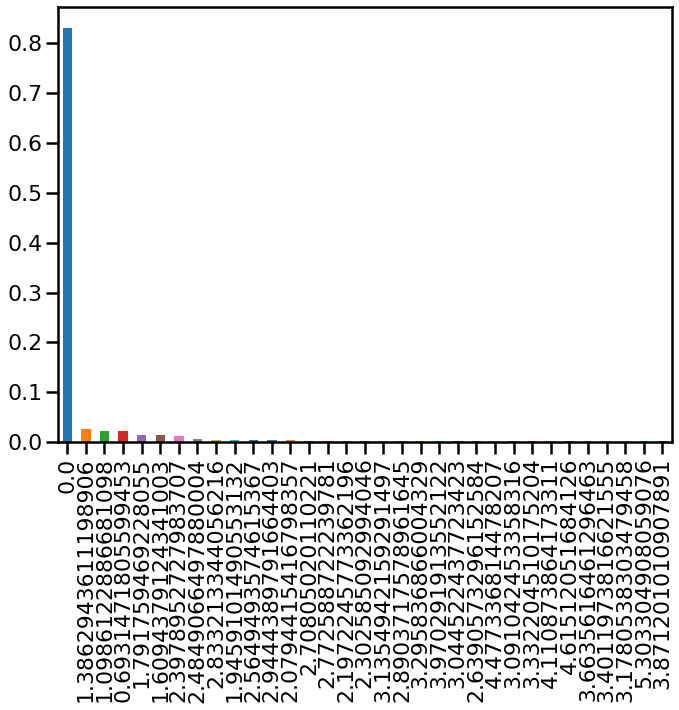

In [44]:
break_down = y_test.value_counts(normalize=True)
break_down.plot(kind='bar')
plt.show()
#ax = train['fatalities'].plot.bar(rot=0)

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context("poster")

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (11,8)
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from merf import MERF
merf = MERF()

In [46]:
# Z_train is the design matrix
Z_train = np.ones((len(X_train), 1))
clusters_train = train1['group']
y_train = train1['fatalities']

In [47]:
mrf = MERF(n_estimators=100, max_iterations=100)
merf.fit(X_train, Z_train, clusters_train, y_train)

INFO     [merf.py:250] GLL is 38484.39764668038 at iteration 1.
INFO     [merf.py:250] GLL is 38241.15366690391 at iteration 2.
INFO     [merf.py:250] GLL is 38415.95993642263 at iteration 3.
INFO     [merf.py:250] GLL is 38226.745672133955 at iteration 4.
INFO     [merf.py:250] GLL is 38203.96450801101 at iteration 5.
INFO     [merf.py:250] GLL is 38229.76644079485 at iteration 6.
INFO     [merf.py:250] GLL is 38133.47781528601 at iteration 7.
INFO     [merf.py:250] GLL is 38261.955811596075 at iteration 8.
INFO     [merf.py:250] GLL is 38219.97437915085 at iteration 9.
INFO     [merf.py:250] GLL is 38360.24117735986 at iteration 10.
INFO     [merf.py:250] GLL is 38315.600990415856 at iteration 11.
INFO     [merf.py:250] GLL is 38334.90416230395 at iteration 12.
INFO     [merf.py:250] GLL is 38277.95506262655 at iteration 13.
INFO     [merf.py:250] GLL is 38287.406237324074 at iteration 14.
INFO     [merf.py:250] GLL is 38326.84637737647 at iteration 15.
INFO     [merf.py:250] GLL is 

Text(0.5, 0, 'Iteration')

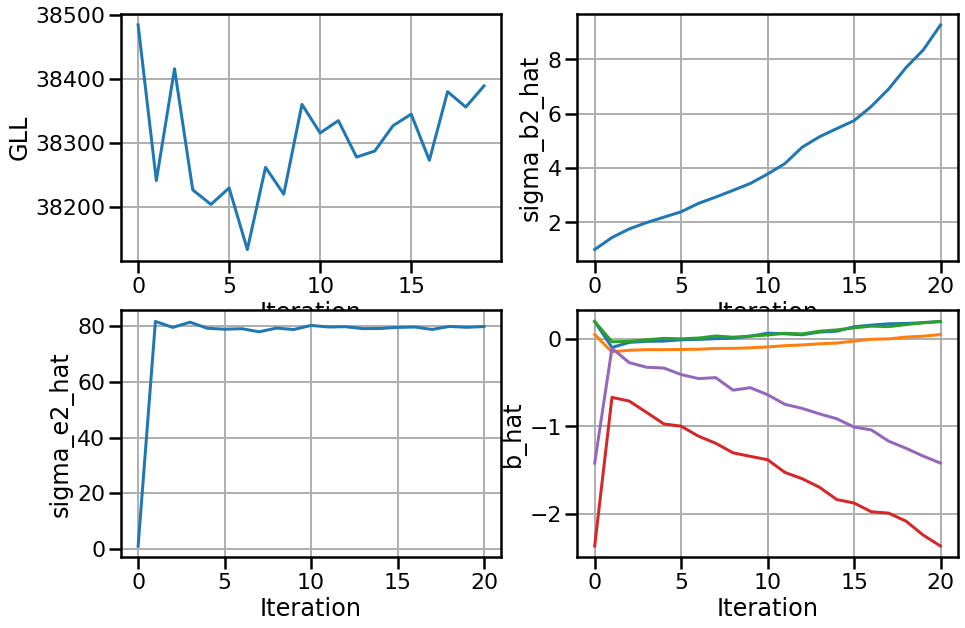

In [48]:
plt.figure(figsize=[15,10])
plt.subplot(221)
plt.plot(merf.gll_history)
plt.grid('on')
plt.ylabel('GLL')
plt.xlabel('Iteration')

plt.subplot(222)
D_hat_history = [x[0][0] for x in merf.D_hat_history]
plt.plot(D_hat_history)
plt.grid('on')
plt.ylabel('sigma_b2_hat')
plt.xlabel('Iteration')

plt.subplot(223)
plt.plot(merf.sigma2_hat_history)
plt.grid('on')
plt.ylabel('sigma_e2_hat')
plt.xlabel('Iteration')

plt.subplot(224)
b_df = pd.concat(merf.b_hat_history, axis=1)

b_df.columns = range(0, 21)


plt.plot(b_df.iloc[0])
plt.plot(b_df.iloc[20])
plt.plot(b_df.iloc[30])
plt.plot(b_df.iloc[40])
plt.plot(b_df.iloc[50])
#plt.plot(b_df.iloc[60])
plt.grid('on')
plt.ylabel('b_hat')
plt.xlabel('Iteration')


Text(0.5, 1.0, 'Distribution of b_is')

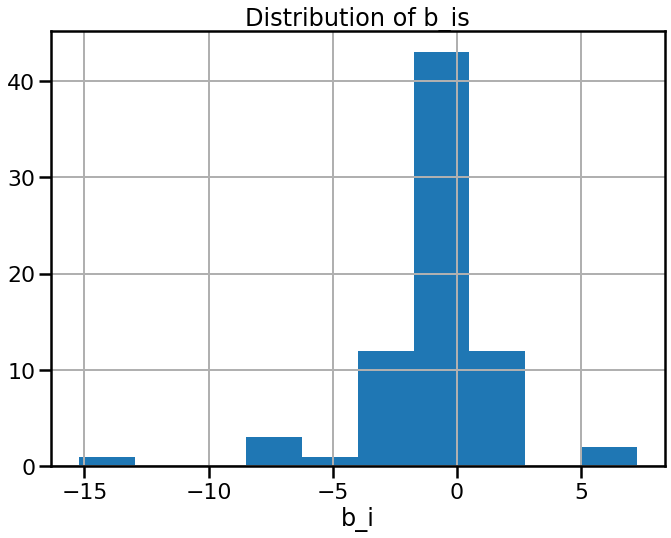

In [49]:
merf.trained_b.hist(bins=10)
plt.xlabel('b_i')
plt.title('Distribution of b_is')

In [50]:
Z_test = np.ones((len(X_test), 1))
clusters_test = test1['group']
y_test = test1['fatalities']

In [51]:
y_hat_test_merf = merf.predict(X_test, Z_test, clusters_test)
assert len(y_hat_test_merf) == len(y_test)

In [52]:
eval_test_merf=pd.DataFrame({'prediction': y_hat_test_merf, 'target variable': y_test})
print('r2 score of the model: ', r2_score(y_test, y_hat_test_merf)) 
print('mse of the model: ',mean_squared_error(y_test, y_hat_test_merf))
print('rmse of the model: ',np.sqrt(mean_squared_error(y_test, y_hat_test_merf)) )

r2 score of the model:  -2.147546789620601
mse of the model:  273.7904877546502
rmse of the model:  16.54661559820165
